<a href="https://www.kaggle.com/code/ananyadevraj/eda-airline-passenger-satisfaction?scriptVersionId=157284017" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style='background-color:#FEF6E9;padding:10px'>
<center><h1 style="font-family:Times New Roman" > <strong>Analysis of Airline Passenger Satisfaction Data </strong> ✈️</h1>

<h2  style="font-family:Times New Roman"> The Dataset & The Project Description</h2></center>

<p style = "font-size:18px; font-family:Times New Roman"> <br> The data used for this project can be found here: <a href = "https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction">Airline Passenger Satisfaction</a>
<br> <br> <strong>Background: </strong> <br> As someone who has always been interested in travel, I understand that the journey, primarily consisting of inflight time, is an essential part of the traveling experience. Growing up in Singapore, every year I would read the news about the <a href = "https://www.worldairlineawards.com/worlds-top-10-airlines-2023/"> Skytrax World Airline Awards</a> , seeing Singapore Airlines in one of the top spots, often first place. 
<br> But, what exactly makes an airline the best airline in the world? <br><br>
<em>The problem questions:</em> </p> 
<ul style = "font-size:18px; font-family:Times New Roman">
<li> How can airlines know which factors are most important for/the strongest contributors to customer satisfaction? </li>
<li> Which factors contributing to satisfaction correlate with one another? </li>
<li> Are a random set of customers more likely to be satisfied or neutral/dissatisfied with an airline experience? </li> </ul>
    
<p style = "font-size:18px; font-family:Times New Roman"><strong> Data: </strong> The dataset contains information on airline passenger satisfaction based on a survey. This is a breakdown of the information in the dataset and which category the data falls into: 
    <br> <br> 1. Information about the customer: the data includes information about each customer such as whether their gender, their loyalty to the airline, their age<br> <br>
2. Specifics about the customer's travel: This data includes the type of travel (purpose of the travel eg. for Business) for each customer, as well as which class they are travelling in (Economy, Economy plus, or Business <br><br>
3. Flight information: The distance of the flight, as well as the departure and arrival delays in minutes <br><br>
4. Categories that passengers were asked to rate out of 5 to indicate their level of satisfaction: ease of online booking, gate location, food and drink, online boarding, seat comfort, inflight entertainment, inflight wifi service, on-board service, leg room service, baggage handling, check-in service, inflight service, and cleanliness <br><br>
5. Overall satisfaction: A summary category indicating whether the customer is satisfied, or neutral/dissatisfied. <br><br>
 <strong> Objective: </strong> Visualize and interpret the passenger satisfaction data, find the relationships between category ratings and overall satisfaction of the passenger, as well as analyze the results. </p>
</div>

<hr class="solid">

<center> <h1 style='font-family: Times New Roman;background-color:#FEF6E9;padding:20px'> Section 1: Data Cleaning </h1> </center>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('../input/airline-passenger-satisfaction/train.csv')

In [3]:
pd.set_option('display.max_columns',35) #To display the whole dataset

<h2 style = "font-family:Times New Roman"> <strong>a. Understanding the Structure of the Dataset</strong> </h2> 

In [4]:
df.shape

(103904, 25)

<p style="font-family:Times New Roman; font-size:18px"> The data has 103,904 entries of 25 columns. </p>

In [5]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


<p style = "font-family:Times New Roman;font-size:18px"> We can see that each row represents the data for one customer, and that there is information about their 1-5 ratings (0 if there is no data on what they rated that category) for each category.</p>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

<p style = "font-family:Times New Roman;font-size:18px"> <em>There are a few things to notice in terms of data cleaning: </em><br><br> 
    a. The column "Arrival Delay in Minutes" has 103904-103594 = <strong> 310 </strong> missing values <br>
b. The first two columns are unnecessary, as they are not relevant to the analysis <br>

In [7]:
df.describe() 

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<p style="font-family:Times New Roman;font-size:18px"> The mean, standard deviation, min and max, as well as median and quartile values are given above for each quantitative attribute.</p>

<hr class="solid">

<h2 style="font-family:Times New Roman"> <strong> b. Preparing data for analysis </strong></h2>

<p style="font-family:Times New Roman;font-size:18px"> The first thing I will do is change the text in two columns. Firstly, the "Customer Type" column's language is rather irregular; what makes a "disloyal" customer is unclear.  Therefore, for clarity purposes, I will label the customers "regular and irregular." Secondly, "On-board service" and "inflight service" may be mistaken for the same thing. Therefore, I will call "on-board service" "boarding service" instead in order to make this distinction more clear. </p> 

In [8]:
#Renaming the onboard service column 
df = df.rename(columns={'On-board service': 'Boarding service'})

#Changing the customer types to regular and irregular flyers 
df['Customer Type'].replace('Loyal Customer', 'Regular Flyer', inplace=True)
df['Customer Type'].replace('disloyal Customer', 'Irregular Flyer', inplace=True)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Boarding service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Regular Flyer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,Irregular Flyer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Regular Flyer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Regular Flyer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Regular Flyer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
#Removing the first two columns
df = df.drop(labels = ['Unnamed: 0','id'], axis = 1)

In [10]:
#Null values
df.isnull().sum() 

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
Boarding service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [11]:
df['Arrival Delay in Minutes'].mean()

15.178678301832152

<Axes: xlabel='Arrival Delay in Minutes'>

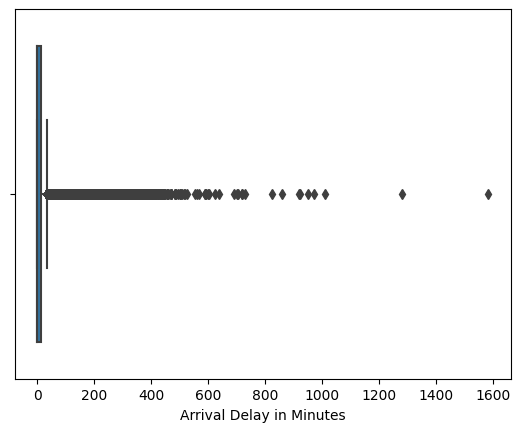

In [12]:
sns.boxplot(x='Arrival Delay in Minutes',data = df)

In [13]:
df['Arrival Delay in Minutes'].value_counts()

Arrival Delay in Minutes
0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: count, Length: 455, dtype: int64

<p style="font-family:Times New Roman;font-size:18px"> Despite the mean of the 'Arrival Delay in Minutes' column being 15.13, we can see from the boxplot that almost any value except 0 is an outlier. The the mode of the column is 0 by a large margin, and the 310 missing values are few compared to the large number of total entries. In considering this along with most values being outliers other than 0, I will fill in the Average Delay in Minutes column's null values with 0.  </p>

In [14]:
df.fillna(0,inplace = True)
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
Boarding service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

<p style="font-family:Times New Roman; font-size:18px"> I am also going to add a new column to the data, which displays the average rating, from 1 to 5, that a customer has given the airline across all categories. This would be helpful to evaluate an "overall" rating for the airline from each customer. </p>

In [15]:
df['Average'] = df.iloc[:,list(range(6,20))].mean(axis=1,)
print(df.columns)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'Boarding service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Average'],
      dtype='object')


<p style="font-family:Times New Roman;font-size:18px"> There are no longer missing values in the data, and an average column has been added.  </p>

In [16]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Boarding service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Average
0,Male,Regular Flyer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,3.857143
1,Male,Irregular Flyer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,2.285714
2,Female,Regular Flyer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,3.714286
3,Female,Regular Flyer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,3.000000
4,Male,Regular Flyer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,3.500000


<hr class="solid">

<center><h1 style='font-family: Times New Roman;background-color:#FEF6E9;padding:20px'> Section 2: Data Visualization and Analysis</h1> </center>

<h2 style="font-family: Times New Roman"> <strong>a. Overall Satisfaction, Class, and Flight Distance </strong></h2>

<p style="font-family:Times New Roman;font-size:18px"> The most important column in the dataset is the final satisfaction of the customer - whether they are satisfied, or neutral/dissatisfied. It would be helpful to see the overall distribution of satisfaction in the dataset: </p>

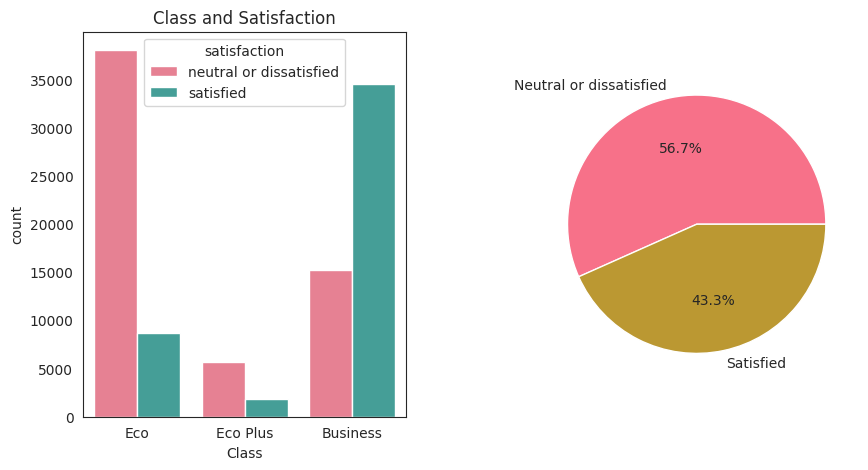

In [17]:
sns.set_style("white")
fig,ax = plt.subplots(1,2,figsize = (10,5))

plt.subplots_adjust(hspace = 0.6, wspace=0.4)

sns.countplot(x='Class',data = df, hue = 'satisfaction', order=['Eco', 'Eco Plus','Business'], palette='husl', ax = ax[0])
ax[0].set_title('Class and Satisfaction')

ax[1]=plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("husl"), autopct = '%1.1f%%')
pass


<p style="font-family:Times New Roman;font-size:18px"> 56.7% of the passengers in the survey were neutral or dissatisfied, the rest being satisfied with the airline. It is reasonable to assume that the class passengers are traveling in affects their satisfaction, which is corroborated by the barplot on the left. Economy and Economy Plus tend to have more neutral or dissatisfied customers than satisfied customers, whereas Business Class has more satisfied customers than dissatisfied customers. Notably, Economy Plus has the lowest count, therefore, there is an unequal distribution in the class of customers in the dataset, however, this may also be because Economy Plus is generally flown the least.</p>

<br> <h3 style="font-family:Times New Roman;font-size:18px"> <strong>NOTE:</strong> The problem with taking an average rating...</h3>

<p style="font-family:Times New Roman;font-size:18px"> The average rating for neutral or dissatisfied customers is around 2.95, whereas the average rating for satisfied customers is 3.62. The distribution for average ratings can be seen below: </p>

[Text(0.5, 1.0, 'Distribution of Average Ratings by Satisfaction')]

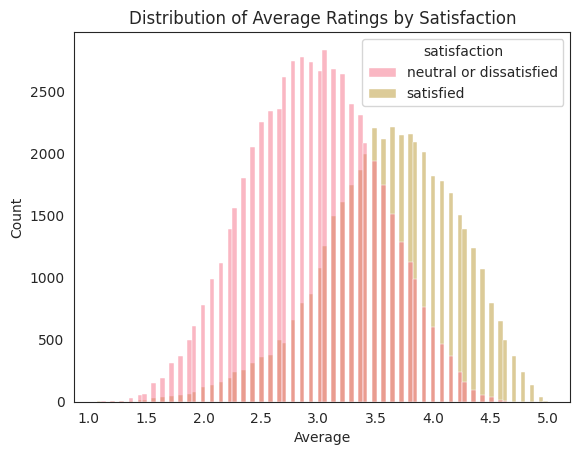

In [18]:
sns.set_palette('husl')
sns.histplot(x='Average',data=df, hue = 'satisfaction').set(title ='Distribution of Average Ratings by Satisfaction')

In [19]:
df[df['satisfaction'] == 'satisfied']['Average'].describe() #Average ratings when the customer is satisfied

count    45025.000000
mean         3.616215
std          0.588573
min          1.071429
25%          3.285714
50%          3.642857
75%          4.071429
max          5.000000
Name: Average, dtype: float64

In [20]:
df[df['satisfaction'] != 'satisfied']['Average'].describe() #Average ratings when the customer is neutral or dissatisfied

count    58879.000000
mean         2.953585
std          0.563737
min          1.142857
25%          2.571429
50%          2.928571
75%          3.357143
max          4.642857
Name: Average, dtype: float64

In [21]:
df['Average'].describe() #Overall average ratings

count    103904.000000
mean          3.240724
std           0.661829
min           1.071429
25%           2.785714
50%           3.285714
75%           3.714286
max           5.000000
Name: Average, dtype: float64

<p style="font-family:Times New Roman;font-size:18px"> In fact, you may notice that the maximum value for neutral or dissatisfied customers is a rating of 4.64, which is abnormally high and would be expected to yield a satisfied rating as this implies that there were high ratings throughout the categories. On a similar note, the person with the overall lowest average rating of 1.07 indicated that they were in fact satisfied with the airline, despite this value being lower than the minimum average rating for those who were neutral or dissatisfied. </p>

[Text(0.5, 1.0, 'Boxplot of Average Ratings')]

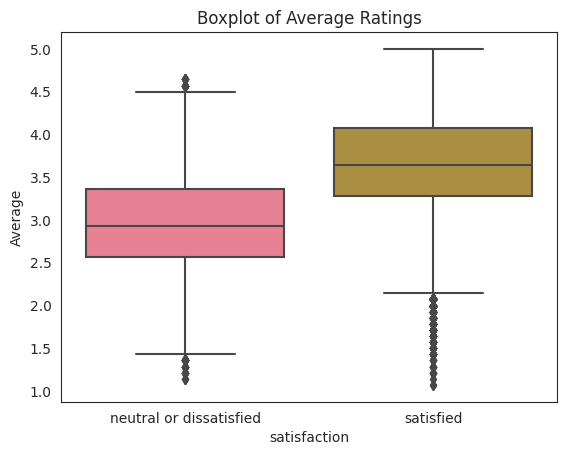

In [22]:
sns.boxplot(y='Average', x='satisfaction',data=df).set(title="Boxplot of Average Ratings")

<p style="font-family:Times New Roman;font-size:18px"> However, the box plot suggests that there are many extreme, outlier values that do not represent the trend in the rest of the dataset, which is important to keep in mind. Considering the prescence of outliers, we can see that the average rating for satisfied customers is clearly higher than that of neutral or dissatisfied customers, with their mean values differing by around 0.66. The data summary numbers therefore do not give the full picture, as the boxplot was necessary to visualize the outliers in such a large dataset. <br><br> 
That being said, we cannot assume that 3.0 is always neutral, and that anything above this is satisfied, and anything below is dissatisfied. The upper and lower quartiles of each satisfaction level shows this -- certain customers have average ratings above 3.0 and are dissatisfied/neutral, and other have average ratings below 3.0 and are satisfied. There may be factors that were not explored in the data contributing to whether or not a customer is satisfied. The average rating also assumes that customers place equal weightage on each category when evaluating their overall satisfaction, which may not be the case -- they may prioritize certain factors over others. It would be most beneficial to break down the data based on each individual factor, rather than the averages as a whole. </p>

[Text(0.5, 1.0, 'Distribution of Flight Distance by Class')]

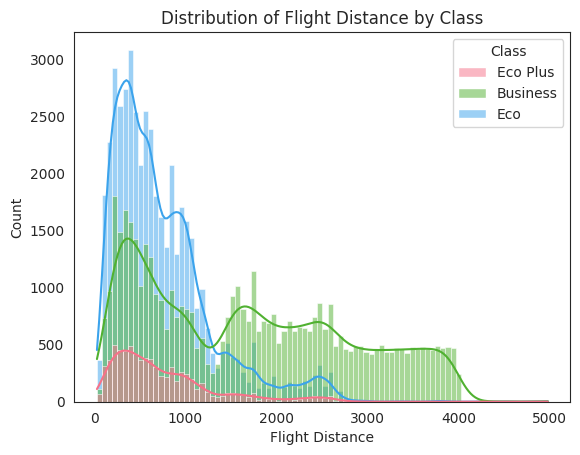

In [23]:
sns.histplot(x='Flight Distance',data=df,hue='Class',kde=True,palette='husl').set(title='Distribution of Flight Distance by Class')


<p style="font-family:Times New Roman;font-size:18px"> We can also see that as flight distance increases, more people take Business class than Economy or Economy Plus. However, for short distances, particularly those under 1000 miles, Economy class is by far the most popular choice. Economy Plus is consistently the least popular choice among the flight classes. </p>

<hr class="solid">

<h2 style="font-family: Times New Roman"> <strong>b. Flight Delays </strong></h2>

<p style="font-family:Times New Roman;font-size:18px"> It is logical to believe that departure delays and arrival delays are strongly related to one another, which is shown by the seemingly linear relationship in the visualization below. The visualization represents the relationship between departure and arrival delays -- logically, the higher the value of the departure delay, the higher the value of the arrival delay. </p>

<Axes: title={'center': 'Satisfaction based on Delay'}, xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

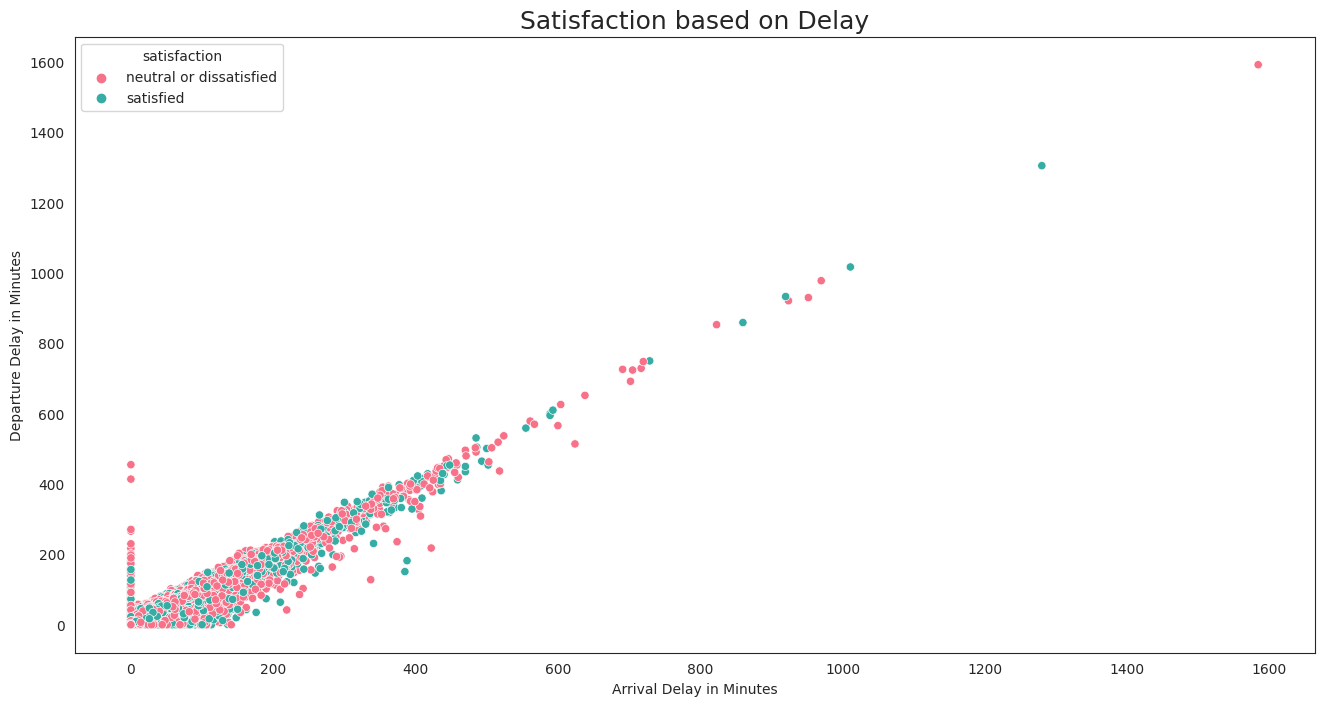

In [24]:
plt.figure(figsize=(16,8))

plt.title('Satisfaction based on Delay',size=18)

sns.scatterplot(y='Departure Delay in Minutes',data=df,x='Arrival Delay in Minutes',hue='satisfaction',palette='husl',)


<p style="font-family:Times New Roman;font-size:18px"> One thing to note from this visual is that we cannot necessarily conclude that customers are more satisfied when delay time is lower. There is a significant portion of 'neutral or dissatisfied' review that lie with very low departure and arrival delay times. However, there are more dissatisfied customers than satisfied customers among the points with the highest arrival and departure delay times. It is reasonable that the highest arrival and departure delay combination led to a dissatisfied or neutral customer review, however, there are also satisfied reviews among some of the highest arrival and delay times. This suggests that customers may value other factors more rather than the timeliness of the flight. <br> <br> Perhaps, I can add a new column holding values that are the sum of the arrival and departure delays in order to plot this against average satisfaction ratings. </p>

In [25]:
df['Total Delay'] = df['Arrival Delay in Minutes'] + df['Departure Delay in Minutes']
df['Total Delay'].head()

0    43.0
1     7.0
2     0.0
3    20.0
4     0.0
Name: Total Delay, dtype: float64

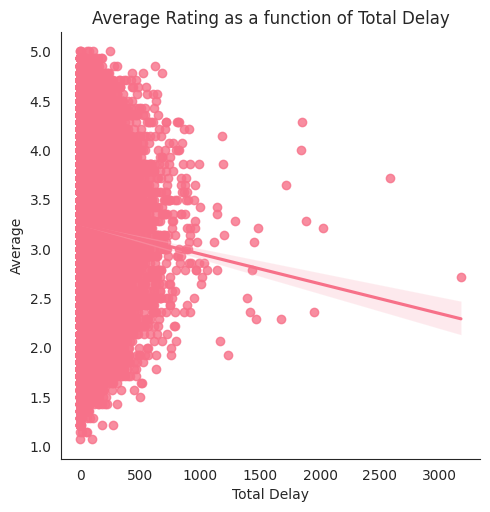

In [26]:
sns.lmplot(x="Total Delay", y='Average',data = df,fit_reg=True).set(title='Average Rating as a function of Total Delay')

In [27]:
from scipy import stats
print(stats.pearsonr(df['Total Delay'], df['Average']))

def rsquared():
    return stats.pearsonr(df['Total Delay'], df['Average'])[0]**2
print("The R squared value is {}".format(rsquared()))

PearsonRResult(statistic=-0.03469131738148315, pvalue=4.792117538062019e-29)
The R squared value is 0.001203487501662795


<p style="font-family:Times New Roman;font-size:18px"> Both the regression plot and the correlation coefficient, r value of the regression indicate a negative relationship between Total Delay and Average Rating -- as total delay increases, we expect a customer's average rating of the airline to decrease, which is intuitive. However, the correlation coefficient is -0.035, while the R squared value is 0.0012. These are very low values and suggest a very weak linear relationship between total delay and average rating. <br> The R squared value indicates that only 0.12% of the variance in average rating has to do with the linear relationship with total delay, the remaining 99.88% are due to the other factors, including but not limited to the ones that the dataset explores.   </p>

<hr class="solid">

<h2 style="font-family: Times New Roman"> <strong>c. Customer Ratings</strong></h2>

<p style='font-family:Times New Roman;font-size:18px'>This is arguably the most important section of analysis as it involves the actual customer-provided data from the survey conducted on their ratings of the various categories. First, I will create a heatmap of the correlation coefficients for the relationships between each of the numerical variables. In order to also establish a relationship with satisfaction, I also gave satisfaction a numerical value of 1, and neutral/dissatisfaction a numerical value of 0. </p>

<Axes: >

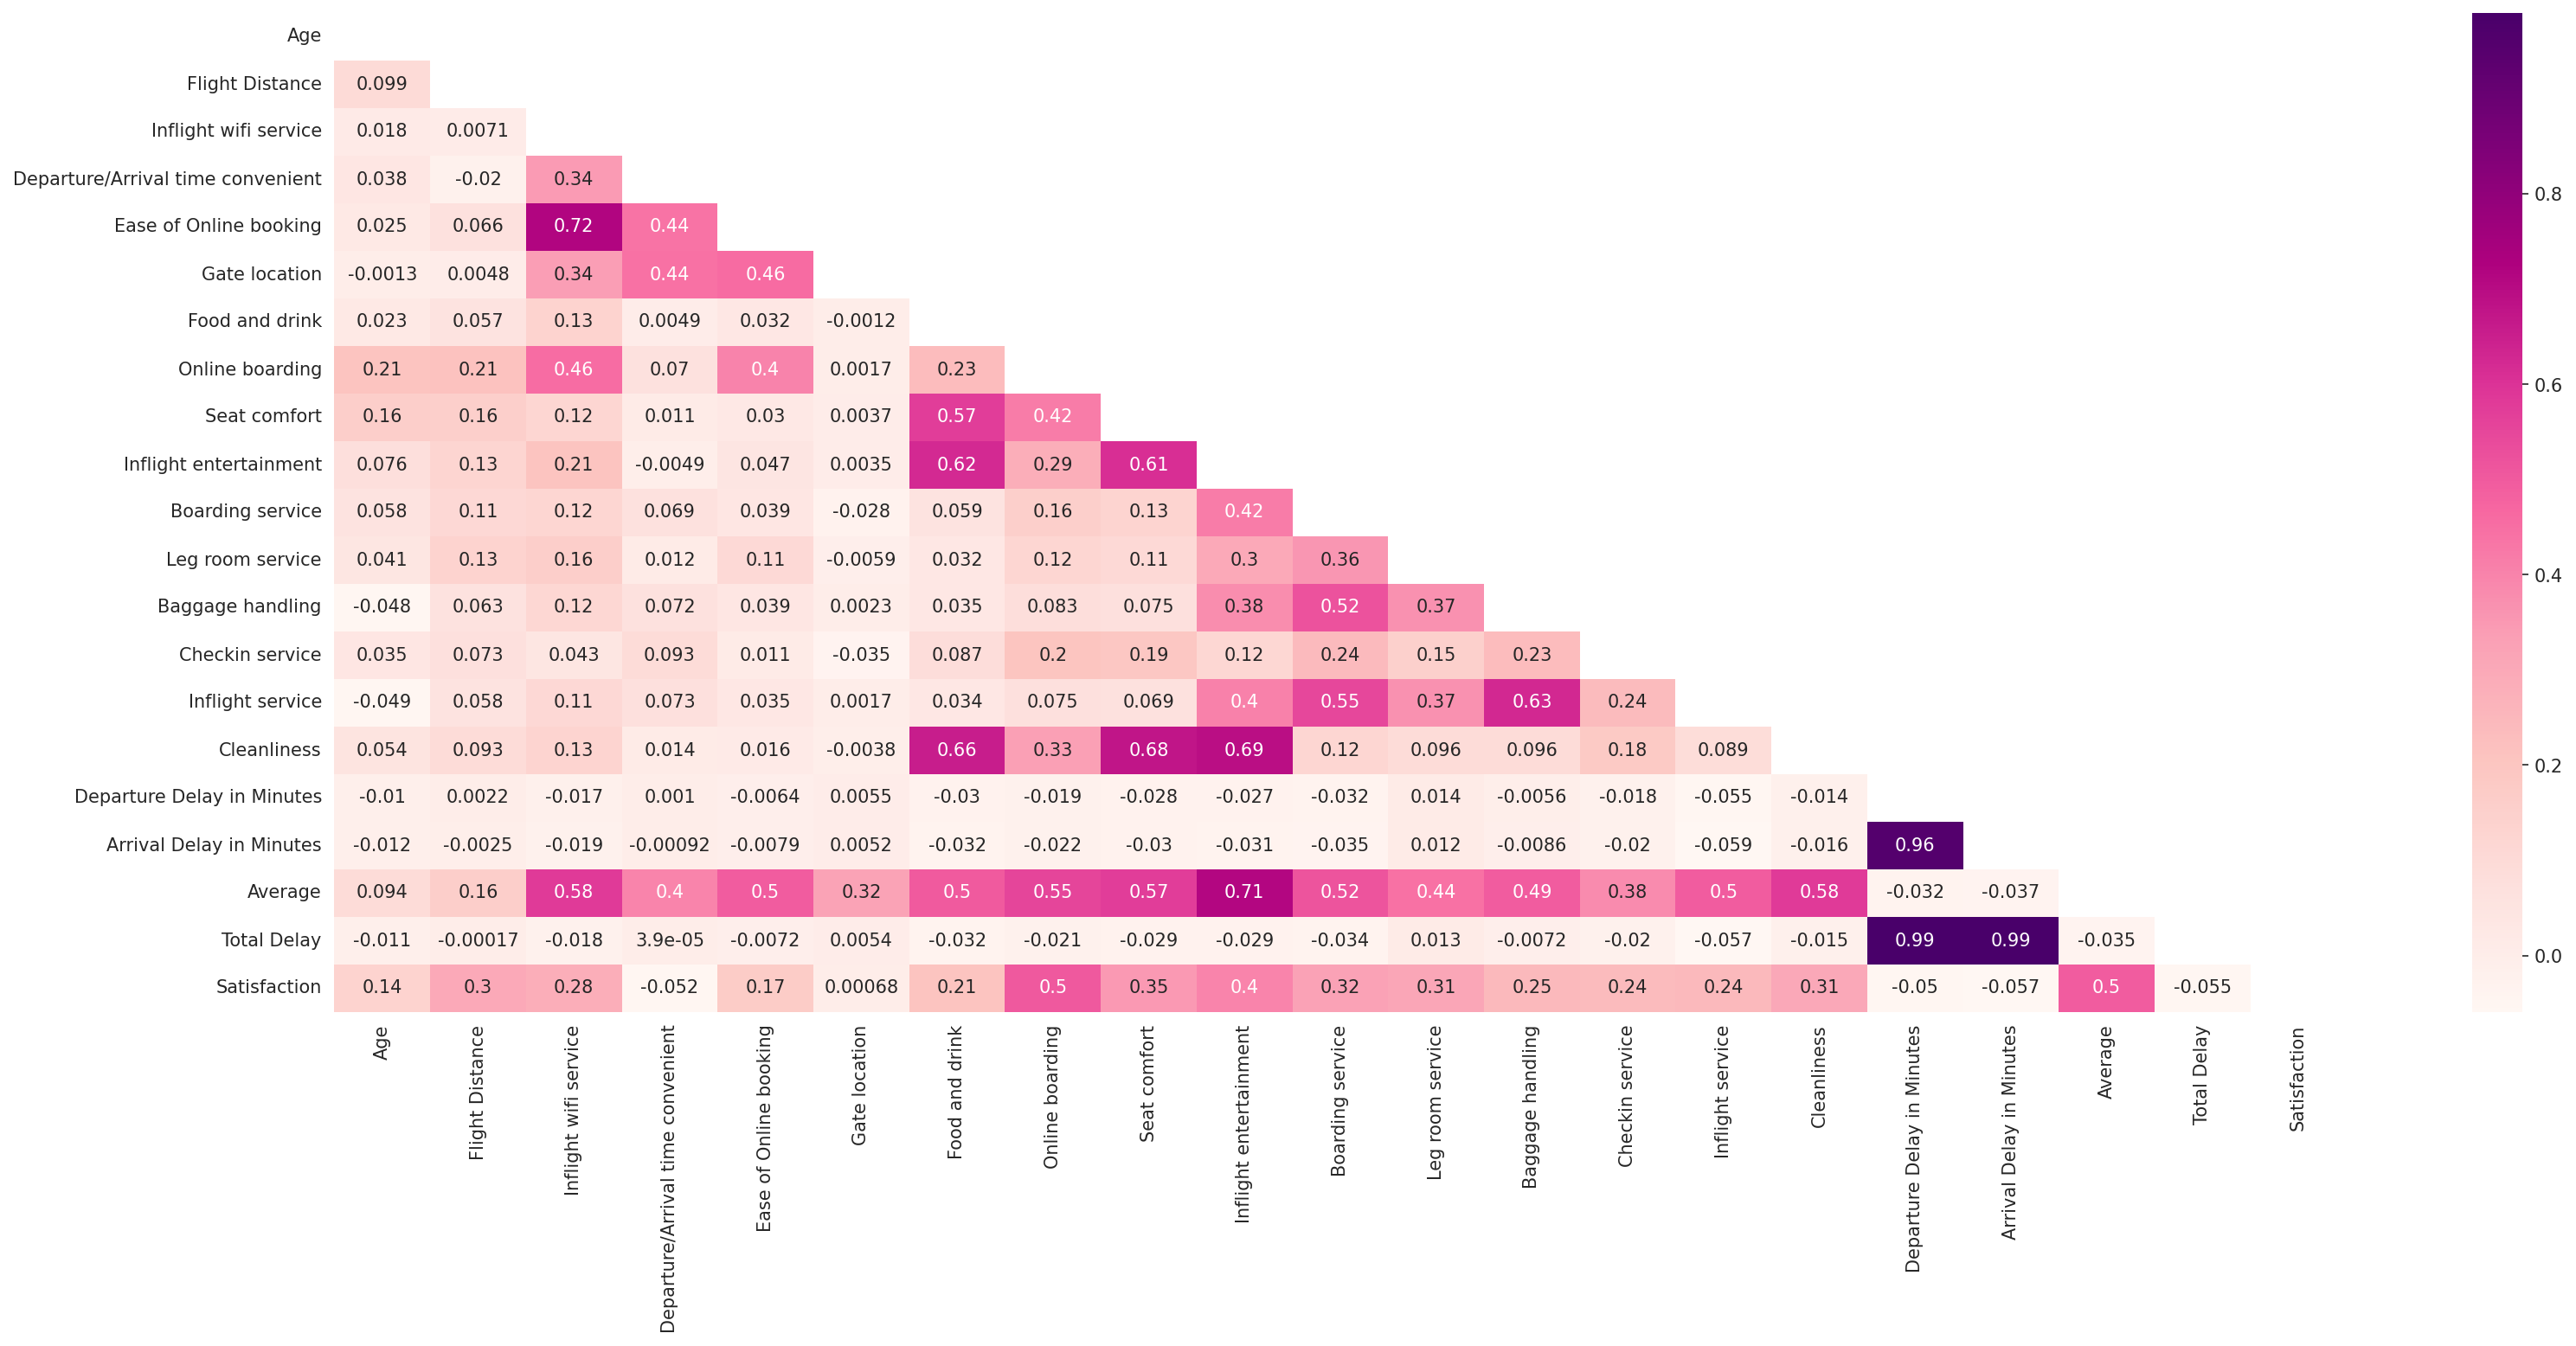

In [28]:
#Making a Dataframe with only the numerical columns in order to draw the heatmap. Also replacing The satisfaction column Satisfied and Neutral or Dissatisfied with 1 and 0 correspondingly.'''
heatmap_df=df.copy()
heatmap_df['Satisfaction']=heatmap_df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})


plt.figure(figsize=(25,10),dpi=150)

sns.heatmap(heatmap_df._get_numeric_data().corr(),annot=True,cmap='RdPu',mask=np.triu(heatmap_df._get_numeric_data().corr()))


<p style='font-family:Times New Roman;font-size:18px'><strong>Noteable obeservations:</strong> 
<br><br> 1. The ratings of ease of online booking and inflight wifi service are two of the most strongly correlated variables with one another, with an r value of 0.72. 
<br><br> 2. Cleanliness ratings have a relatively strong positive correlation with food and drink, seat comfort, and inflight entertainment ratings. 
<br><br> 3. Out of all of the individual factors, online boarding ratings have the strongest positive relationship to satisfaction. However, it is still not necessarily a strong correlation as the r value is only 0.5.
<br><br> 4. Baggage handling and inflight service have a relatively strong positive correlation (r=0.63). 
<br><br> 5. Gate location has the weakest relationship to satisfaction (r=0.00068) <br><br> 
Overall, there are not many categories that seem to have a significantly strong relationship relative to others with another category, as well as with total satisfaction. It may be beneficial to group some of the specific categories together into slightly broader categories and compute their relationship to satisfaction in a different manner, as factors put together may have a larger impact on satisfaction. 
</p>

<p style="font-family:Times New Roman;font-size:18px">  <em>In order to streamline the analysis, I decided to create broader categories out of the ones that currently exist in the dataset:</em> <br><br> 
1. Time and Location: 'Departure and arrival time convenient," "Gate location" <br><br>
2. Inflight Entertainment: 'Inflight wifi service,' 'inflight entertainment' <br><br>
3. Online services: 'Ease of Online booking', 'Online boarding' <br><br>
4. Food and drink <br><br>
5. Comfort: 'Leg room service', 'seat comfort' <br><br>
6. Cleanliness <br><br>
7. Service: 'Boarding service', 'Baggage handling', 'Checkin service', 'Inflight service' <br><br>
These new categories will help make analysis simpler, under the assumption that subcategories in each broader categories are related to one another in terms of their performance. For example, good leg room is expected to relate to good seat comfort, and ease of online booking would also relate to ease of online check-in. <br> <br> <em>METHODOLOGY:</em> The average rating within each of these categories will be calculated for each customer, and then each category will be compared with another in order to see which one has the greatest effect on overall satisfaction and average rating. </p>

In [29]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'Boarding service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Average', 'Total Delay'],
      dtype='object')

In [30]:
#Adding columns for the average ratings of each of the new categories

df['Time and Location']=(df['Departure/Arrival time convenient'] + df['Gate location'])/2
df['Inflight Entertainment']= (df['Inflight wifi service'] + df['Inflight entertainment'])/2
df['Online Services'] = (df['Ease of Online booking'] + df['Online boarding'])/2
df['Comfort'] = (df['Leg room service'] + df['Seat comfort'])/2
df['Service']=(df['Boarding service'] + df['Checkin service']+df['Baggage handling']+df['Inflight service'])/4
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Boarding service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Average,Total Delay,Time and Location,Inflight Entertainment,Online Services,Comfort,Service
0,Male,Regular Flyer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,3.857143,43.0,2.5,4.0,3.0,4.0,4.25
1,Male,Irregular Flyer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,2.285714,7.0,2.5,2.0,3.0,3.0,2.25
2,Female,Regular Flyer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,3.714286,0.0,2.0,3.5,3.5,4.0,4.00
3,Female,Regular Flyer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,3.000000,20.0,5.0,2.0,3.5,3.5,2.50
4,Male,Regular Flyer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,3.500000,0.0,3.0,3.0,4.0,4.5,3.25


<p style="font-family:Times New Roman;font-size:18px"> In order to analyze which factors are weighted most when it comes to passenger satisfaction, I will calculate the following conditional probability: What is the probability that a customer is satisfied given that they are satisfied with X category? Where X will be one of the new categories defined above. I will also be calculating the opposite - What is the probability that a customer is neutral/dissatisfied given that they are neutral/dissatisfied with X category? I will be using the following formula to do so:   </p>

$$ P(A | B) = \frac{P(A\cap B)}{P(B)}$$

<p style="font-family:Times New Roman;font-size:18px"> For the first condition, A is overall customer satisfaction and B is the event that the customer rates a specific category as satisfactory too. For the second, A is overall customer neutrality/dissatisfaction and B is the event that the customer rates a specific category as neutral/dissatisfactory too. <br> We will use $rating > 3$ as a way to measure satisfaction, and $rating \leq 3$ as a way to measure if a factor was rated with neutrality or dissatisfaction. To visualize the process, it will look something like this:  </p>

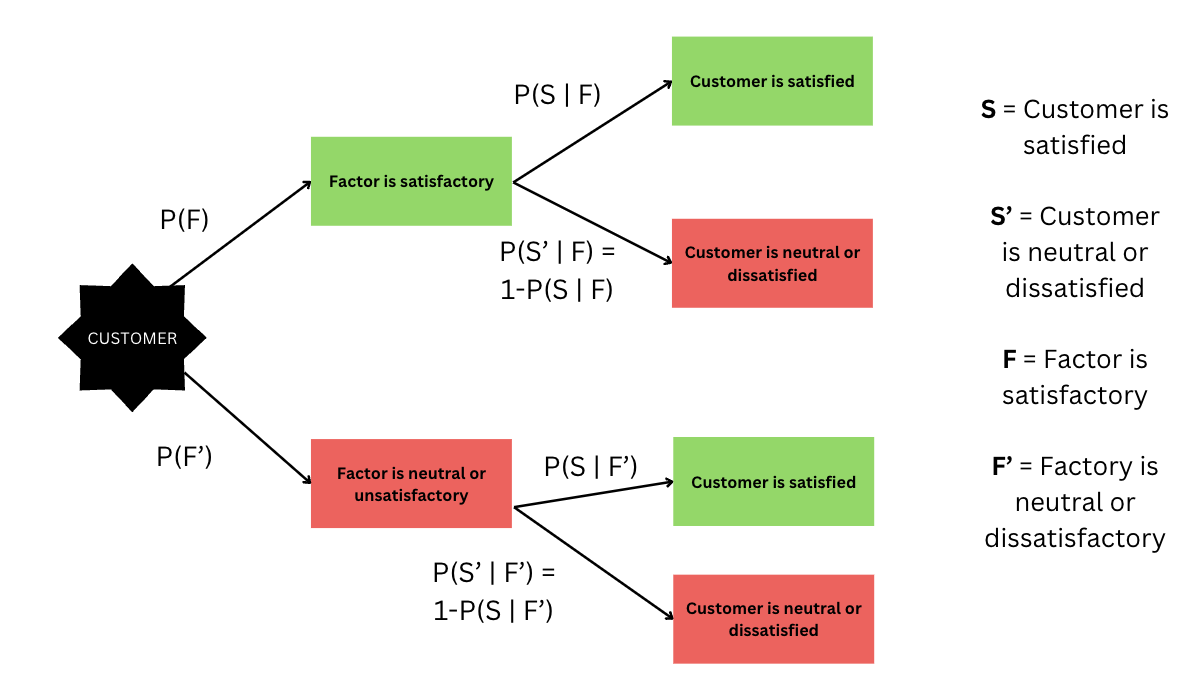

<p style="font-family:Times New Roman;font-size:18px"> I will be creating functions in order to calculate the conditional probabilities: </p>

In [31]:
len(df) #finding the total number of rows, will be used to calculate probabilities 

103904

In [32]:
def satisfactory_probability(): #defining a function to calculate the probability that the customer will be satisfied given that they are satisfied with one of the categories
    
    factors = ['Time and Location','Inflight Entertainment','Online Services','Food and drink','Comfort','Cleanliness','Service']
    probabilities = []
    
    for factor in factors: 
        numerator = len(df[(df[factor] > 3) & (df['satisfaction']=='satisfied')])/103904 #P(S n F)
        denominator = len(df[df[factor]>3])/103904 #P(F)
        probabilities.append(numerator/denominator) #adds the probability to the list
        
    return list(zip(factors,probabilities))

def unsatisfactory_probability():  #defining a function to calculate the probability that the customer will be neutral/dissatisfied given that they are neutral/dissatisfied with one of the categories
    
    factors = ['Time and Location','Inflight Entertainment','Online Services','Food and drink','Comfort','Cleanliness','Service']
    probabilities = []
    
    for factor in factors: 
        numerator = len(df[(df[factor] <= 3) & (df['satisfaction']=='neutral or dissatisfied')])/103904 #P(S' n F')
        denominator = len(df[df[factor]<=3])/103904 #P(F')
        probabilities.append(numerator/denominator)
        
    return list(zip(factors,probabilities)) 

<p style="font-family:Times New Roman;font-size:18px"> This is the probability that the customer will overall be satisfied given that the category is rated > 3, in other words, if the customer is satisfied with it.  </p>

In [33]:
satisfactory_probability() 

[('Time and Location', 0.4205895191490339),
 ('Inflight Entertainment', 0.660164576982144),
 ('Online Services', 0.6691654288897141),
 ('Food and drink', 0.5364672608844704),
 ('Comfort', 0.5996697171953485),
 ('Cleanliness', 0.5687615304403626),
 ('Service', 0.5471930815180243)]

<p style="font-family:Times New Roman;font-size:18px"> This is the probability that the customer will overall be neutral/dissatisfied given that the category is rated $\leq$ 3, in other words, if the customer is neutral/dissatisfied with it.  </p>

In [34]:
unsatisfactory_probability() 

[('Time and Location', 0.5574804975404541),
 ('Inflight Entertainment', 0.7308426099507276),
 ('Online Services', 0.7337542751907393),
 ('Food and drink', 0.6507722952194577),
 ('Comfort', 0.7779209997378309),
 ('Cleanliness', 0.6916500111037086),
 ('Service', 0.7759930066109382)]

<p style="font-family:Times New Roman;font-size:18px"> <strong> Observations: </strong><br><br> 1. Time and location being rated positively is the least important criteria for whether or not a customer is satisfied, and is the least significant category overall as the same applies to a negative or neutral rating and its effect on dissatisfaction. $\rightarrow$ this is also corroborated by the correlation coefficients between departure/arrival time convenient & gate location and satisfaction being very low, as per the heatmap. <br><br> 2. Online services and inflight entertainment are the two most important factors towards customer satisfaction $\rightarrow$ the probability that a customer will be satisfied overall is highest given that these two criteria are rated positively. <br><br> 3. Comfort, Service, Online services, and inflight entertainment have a relatively large impact if they are rated negatively; if they are rated negatively (or neutrally), there is a relatively larger probability that the customer will be neutral or dissatisfied given this. <br><br> 4. The most important observation may be that negative or neutral factors have a larger impact on overall satisfaction. If a category is rated neutrally or negatively, the probability that the customer will be neutral or dissatisfied overall is higher than the probability that a customer will be satisfied if a category is rated positively. $\rightarrow$ This is true for every category listed above, which suggests that negative experiences have a larger impact on customer experience than positive ones.

<hr class="solid">

<center><h1 style='font-family: Times New Roman;background-color:#FEF6E9;padding:20px'> Section 3: Interpretation and Evaluation</h1> </center>


<p style='font-family:Times New Roman; font-size:18px'> This exploratory data analysis aimed to investigate what makes an airline a good airline, using the following questions as guidelines: </p> 
<ul style = "font-size:18px; font-family:Times New Roman"> <li> How can airlines know which factors are most important for/the strongest contributors to customer satisfaction? </li> <li> Which factors contributing to satisfaction correlate with one another? </li> <li> Are a random set of customers more likely to be satisfied or neutral/dissatisfied with an airline experience? </li> </ul> 
<p style='font-family:Times New Roman; font-size:18px'> Based on my analysis of the data, airlines must emphasize online services and inflight entertainment, including WiFi on board. The probability of customers being satisfied is highest given that these two factors are also satisfactory. Additionally, if online services and inflight entertainment are neutral or dissatisfactory, then there is also a high probability that customers will be neutral/dissatisfied with the airline overall as a result. Skytrax cited the fact that Singapore Airlines has a 'state-of-the-art inflight entertainment system' as a reason for their first place position in the world airline awards; it also has complimentary wifi for all flights for passengers in all classes, further indicating its importance. Ratings for ease of online booking and inflight wifi services are among the most strongly positively correlated factors, so there is large benefit to be extracted from focusing on improving these. <br> <br>It may also be beneficial for airlines to remove their economy plus class, as it has a low rate of usage, and direct their resources towards improving economy class instead, which is, based on the data, where the vast majority of neutral or dissatisfied customer experiences originate. <br> <br>The good news for airlines is that the factors most out of their control - in the 'Time and Location' category, including gate location and the time of the flight, are of least importance and have the weakest correlation to overall customer satisfaction using both the r values method and the conditional probability method. Therefore, the factors that do impact ratings are things that they can implement and change internally, without communication with airports about remodelling gate structures and flight timings. <br><br> One of the most important things to note from the analysis is that customers are more likely to be neutral/dissatisfied with an experience than satisfied. Additionally, a customer is more likely to be neutral or dissatisfied given that a factor has been rated neutrally or negatively rather than being satisfied given that a factor has been rated positively. In essence, neutral or negative sentiments for a specific category have larger implications on overall satisfaction and make a customer significantly less likely to be satisfied. In particular, there is a relatively high probability that a customer will be neutral/dissatisfied given that Comfort and Service were rating neutrally/negatively, meaning that these two factors also have a high impact. Airlines must therefore use the customer data to implement change in the right areas in order to have higher customer satisfaction rates, particularly as factors that are often out of their control, such as timings, delays, and gate locations, are among the least important factors. </p> 
<ul style='font-family:Times New Roman; font-size:18px'> <strong> Evaluation $\rightarrow$ Considerations for future investigation: </strong> <br> 
<li> Instead of using 'Average rating' as a measure by simply taking the mean of all ratings, ask the customers how they would give the airline an overall rating based on their general experience. This way, we will not be assuming that all categories are weighted the same when taking an average rating, and will be able to investigate the relationship between how specific factors are rated and the overall numerical rating. </li> 
<li> Record whether individuals are flying alone in order to see if family considerations or group size affects ratings. </li>  
<li> Gather further details about each flight, for example, is it a connecting flight? If so, how much do ease of connection/transit services affect overall ratings? </li> </ul>